In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
levels = ["level_1", "level_2", "leaf"]
days = 2 ** np.array(range(11))

In [3]:
def save_all_phase_vs_f1_plot(model_dir, days=days, levels=levels):

    all_f1 = {}
    all_f1['days'] = days
    
    # Making the f1 plot
    for level in levels:

        f1 = []
        for d in days:

            df_alpha1 = pd.read_csv(f'{model_dir}/gif/{level}_csv/Trigger + {d} days.csv')
            f1.append(df_alpha1['f1-score'].to_numpy()[-2])

        all_f1[level] = f1    
    return all_f1

def save_all_phase_vs_precision_plot(model_dir, days=days, levels=levels):

    all_f1 = {}
    all_f1['days'] = days
    
    # Making the f1 plot
    for level in levels:

        f1 = []
        for d in days:

            df_alpha1 = pd.read_csv(f'{model_dir}/gif/{level}_csv/Trigger + {d} days.csv')
            f1.append(df_alpha1['precision'].to_numpy()[-2])

        all_f1[level] = f1    
    return all_f1

def save_all_phase_vs_recall_plot(model_dir, days=days, levels=levels):

    all_f1 = {}
    all_f1['days'] = days
    
    # Making the f1 plot
    for level in levels:

        f1 = []
        for d in days:

            df_alpha1 = pd.read_csv(f'{model_dir}/gif/{level}_csv/Trigger + {d} days.csv')
            f1.append(df_alpha1['recall'].to_numpy()[-2])

        all_f1[level] = f1    
    return all_f1

In [4]:
def save_class_wise_phase_vs_accuracy_plot(model_dir, days=days, levels=levels):

    plt.style.use(['default'])

    cm = plt.get_cmap('gist_rainbow')

    # Making the f1 plot
    all_f1 = {}
    all_f1['days'] = days
    
    for level in levels:

        class_wise_f1s = {}
        for d in days:

            df_alpha1 = pd.read_csv(f'{model_dir}/gif/{level}_csv/Trigger + {d} days.csv')

            classes = df_alpha1.iloc[:-3,0].to_numpy()
            f1 = df_alpha1['f1-score'].to_numpy()[:-3]


            for i, c in enumerate(classes):
                
                if c not in class_wise_f1s:
                    class_wise_f1s[c] = []
                
                class_wise_f1s[c].append(f1[i])

        all_f1[level] = class_wise_f1s
    return all_f1

## Macro avg performance

In [5]:
f1_with_md = save_all_phase_vs_f1_plot("../models/lsst_alpha_0.5/")
f1_without_md = save_all_phase_vs_f1_plot("../models/lsst_alpha_0.5_no_md/")

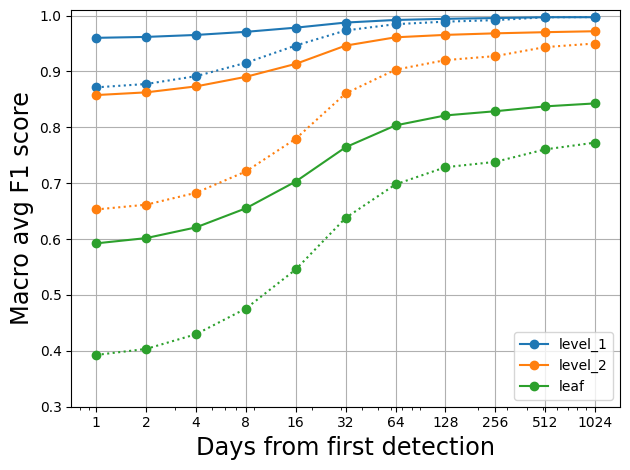

In [7]:

plt.style.use(['default'])

for i, level in enumerate(levels):

    plt.plot(f1_with_md['days'], f1_with_md[level], label=f"{level}", marker = 'o', color=f"C{i}")
    plt.plot(f1_without_md['days'], f1_without_md[level], marker = 'o', color=f"C{i}", linestyle='dotted')
    
    plt.xlabel("Days from first detection", fontsize='xx-large')
    plt.ylabel("Macro avg F1 score", fontsize='xx-large')
    
    plt.grid()
    plt.tight_layout()
    plt.legend(loc='lower right')
    plt.xscale('log')
    plt.ylim(0.3, 1.01)
    plt.xticks(days, days)

plt.savefig(f"../figures/f1-performance-comparison.pdf")
plt.savefig(f"../figures/f1-performance-comparison.jpg")
plt.show()

In [8]:
precision_with_md = save_all_phase_vs_precision_plot("../models/lsst_alpha_0.5/")
precision_without_md = save_all_phase_vs_precision_plot("../models/lsst_alpha_0.5_no_md/")

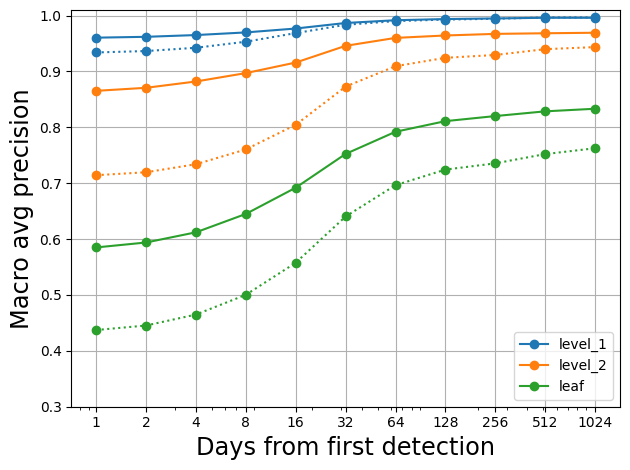

In [9]:

plt.style.use(['default'])

for i, level in enumerate(levels):

    plt.plot(precision_with_md['days'], precision_with_md[level], label=f"{level}", marker = 'o', color=f"C{i}")
    plt.plot(precision_without_md['days'], precision_without_md[level], marker = 'o', color=f"C{i}", linestyle='dotted')
    
    plt.xlabel("Days from first detection", fontsize='xx-large')
    plt.ylabel("Macro avg precision", fontsize='xx-large')
    
    plt.grid()
    plt.tight_layout()
    plt.legend(loc='lower right')
    plt.xscale('log')
    plt.ylim(0.3, 1.01)
    plt.xticks(days, days)

plt.savefig(f"../figures/precision-performance-comparison.pdf")
plt.savefig(f"../figures/precision-performance-comparison.jpg")
plt.show()

In [10]:
recall_with_md = save_all_phase_vs_recall_plot("../models/lsst_alpha_0.5/")
recall_without_md = save_all_phase_vs_recall_plot("../models/lsst_alpha_0.5_no_md/")

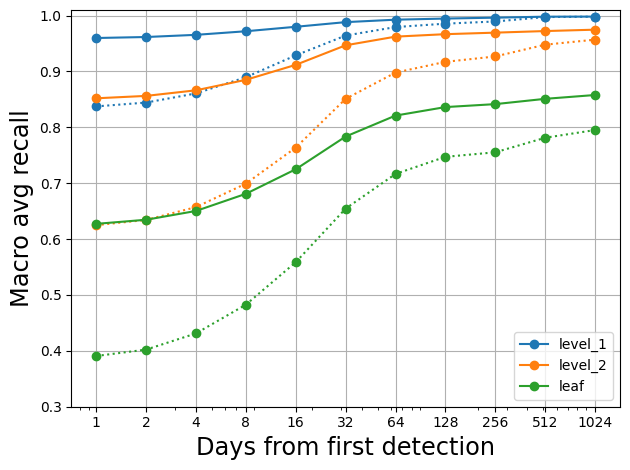

In [11]:

plt.style.use(['default'])

for i, level in enumerate(levels):

    plt.plot(recall_with_md['days'], recall_with_md[level], label=f"{level}", marker = 'o', color=f"C{i}")
    plt.plot(recall_without_md['days'], recall_without_md[level], marker = 'o', color=f"C{i}", linestyle='dotted')
    
    plt.xlabel("Days from first detection", fontsize='xx-large')
    plt.ylabel("Macro avg recall", fontsize='xx-large')
    
    plt.grid()
    plt.tight_layout()
    plt.legend(loc='lower right')
    plt.xscale('log')
    plt.ylim(0.3, 1.01)
    plt.xticks(days, days)

plt.savefig(f"../figures/recall-performance-comparison.pdf")
plt.savefig(f"../figures/recall-performance-comparison.jpg")
plt.show()

## Class-wise performance

In [12]:
class_f1_with_md = save_class_wise_phase_vs_accuracy_plot("../models/lsst_alpha_0.5/")
class_f1_without_md = save_class_wise_phase_vs_accuracy_plot("../models/lsst_alpha_0.5_no_md/")

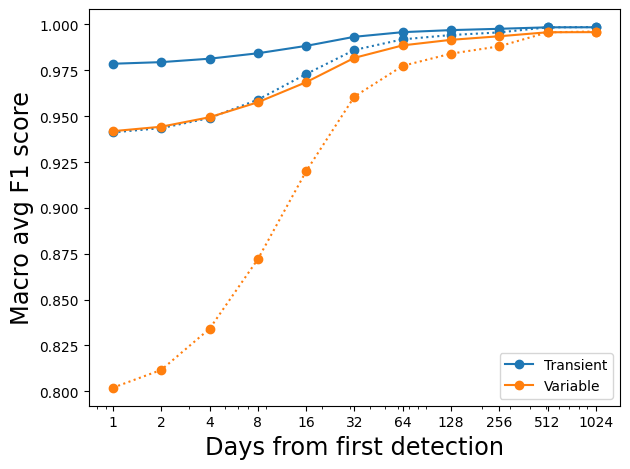

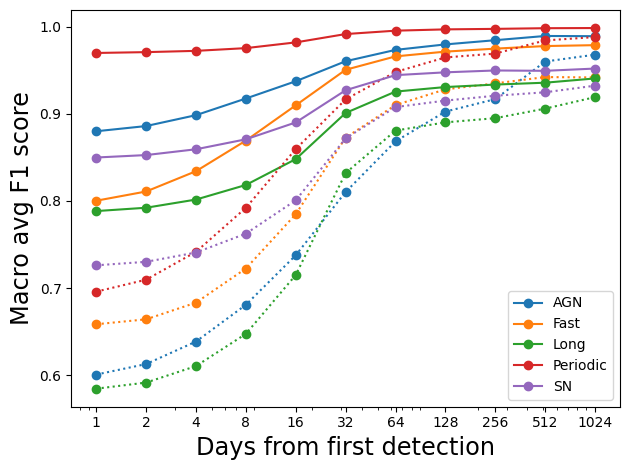

In [13]:
plt.style.use(['default'])
cm = plt.get_cmap('gist_rainbow')

for i, level in enumerate(levels):

    if i==2:
        break

    classes = list(class_f1_with_md[level].keys())
    NUM_COLORS = len(classes)
    color_arr=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

    for j, c in enumerate(classes):
            

        
        plt.plot(class_f1_with_md['days'], class_f1_with_md[level][c], label=f"{c}", marker = 'o', color=f"C{j}")
        plt.plot(class_f1_without_md['days'], class_f1_without_md[level][c], marker = 'o', color=f"C{j}", linestyle='dotted')
        
        plt.xlabel("Days from first detection", fontsize='xx-large')
        plt.ylabel("Macro avg F1 score", fontsize='xx-large')
        
        plt.tight_layout()
        plt.legend()
        plt.xscale('log')
        #plt.ylim(0.3, 1.01)
        plt.xticks(days, days)
    plt.savefig(f"../figures/{level}-f1-class-performance-comparison.pdf")
    plt.savefig(f"../figures/{level}-f1-class-performance-comparison.jpg")
    plt.show()